# Capstone Project – Diabetes Dataset
## Exploratory Data Analysis (EDA)

This notebook explores the Diabetes dataset using Python.  
It includes data cleaning, descriptive statistics, visualisations, and key findings.

# Import Libraries and Load Dataset

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")



# Load and Preview Dataset

In [10]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# Preview
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Dataset Structure and Missing Values


In [11]:
# Check structure
print("Initial shape:", df.shape)
df.info()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values 
df = df.dropna()
print("Cleaned shape:", df.shape)

Initial shape: (442, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
Missing values:
 age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64
Cleaned shape: (442, 11)


### Figure 1: Dataset Info and Missing Value Summary  

Overview of column types, non-null counts, and confirmation that no missing values are present.






# Custom Plotting Functions 


In [12]:
def plot_distribution(df, column, bins=30):
    plt.figure(figsize=(8,5))
    sns.histplot(df[column], kde=True, bins=bins)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

def plot_progression_comparison(df, column):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=column, y='Progression', data=df)
    plt.title(f"{column} vs Diabetes Progression")
    plt.xlabel(column)
    plt.ylabel("Progression")
    plt.show()

# Descriptive statistics

In [13]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Summary of central tendency and spread across all features.


### Figure 2: Summary Statistics for All Features  
Mean, standard deviation, and percentile values for each feature, confirming standardization and variability.

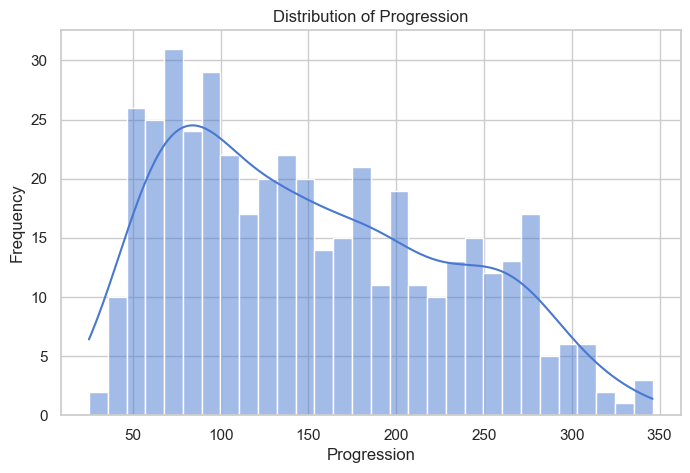

In [14]:
plot_distribution(df, 'Progression')

### Figure 3: Distribution of Diabetes Progression Scores  
Histogram with KDE overlay showing the skewed distribution of progression scores across patients.

# correlation Heatmap


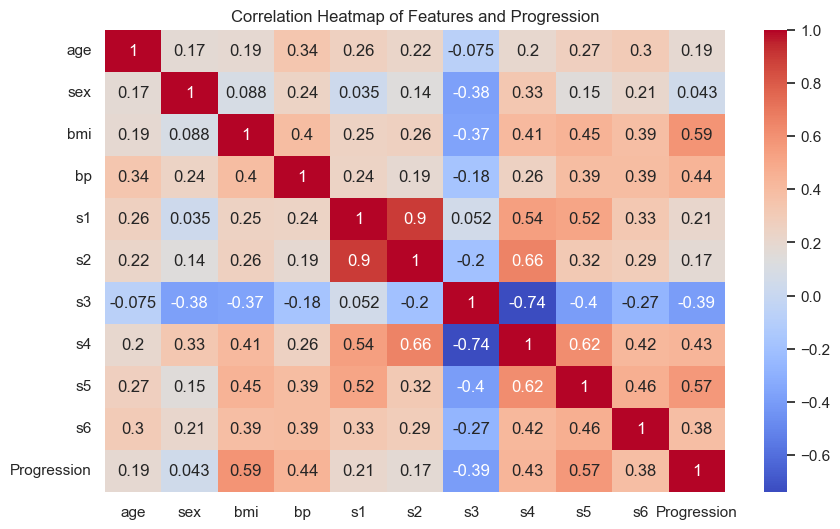

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features and Progression")
plt.show()

### Figure 4: Pearson Correlation Heatmap  

Visual representation of relationships between features and the target variable, highlighting key predictors.


# Feature Comparisons with Progression


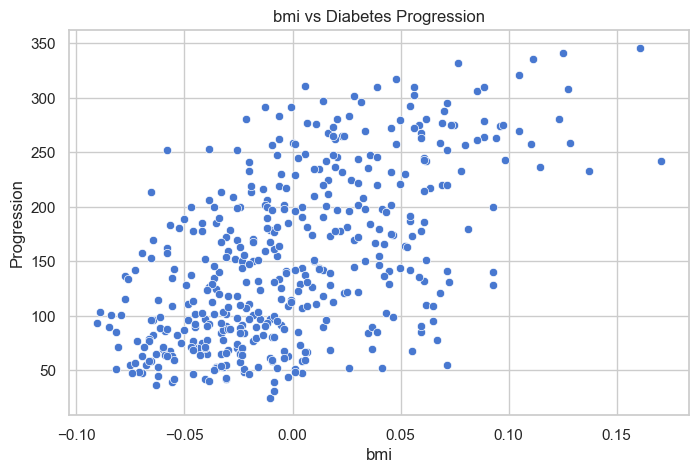

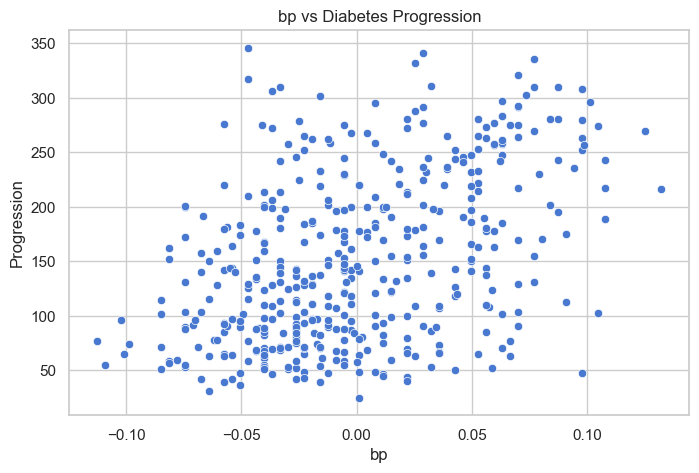

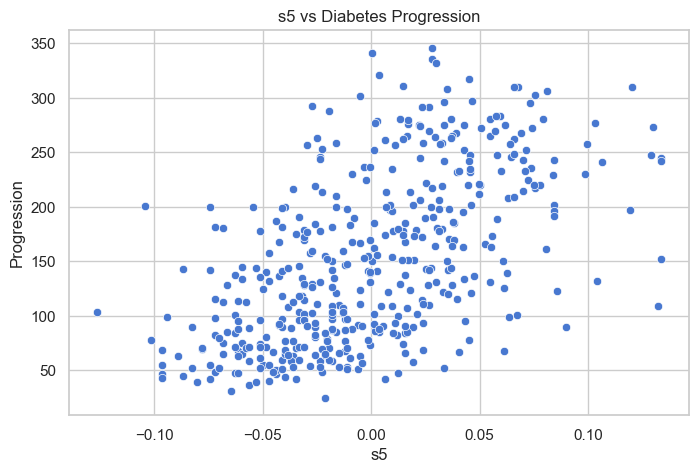

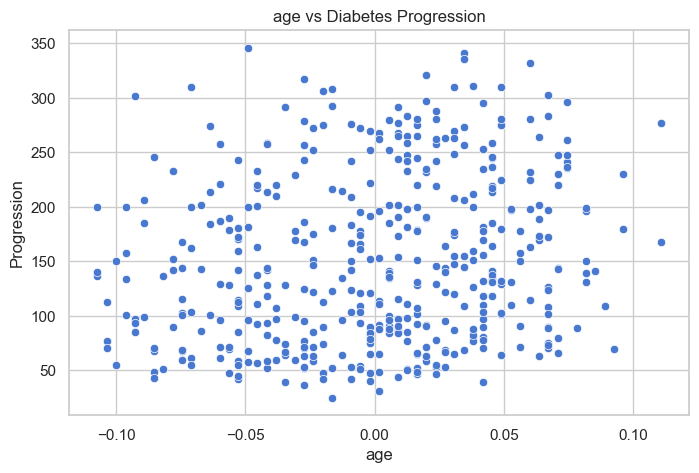

In [16]:
for col in ['bmi', 'bp', 's5', 'age']:
    plot_progression_comparison(df, col)

### Figure 5: BMI Compared to Diabetes Progression  
Scatterplot showing a strong positive relationship between body mass index and disease progression.

### Figure 6: Blood Pressure Compared to Diabetes Progression  
Scatterplot indicating a moderate positive trend between average blood pressure and disease progression.

### Figure 7: Serum Triglycerides (S5) vs Progression  
Scatterplot illustrating the linear correlation between log-transformed triglyceride levels and progression scores.

### Figure 8: Age Compared to Diabetes Progression  
Scatterplot showing that older patients tend to have higher progression scores.

# Key Findings  

- BMI and S5 are the strongest predictors of diabetes progression.  
- Age and blood pressure also contribute meaningfully to outcome variability.  
- The dataset is well-suited for regression modelling and further predictive analysis.  
- No data quality issues were found, and all features are statistically valid.

# Conclusion
This EDA has revealed meaningful relationships between physiological features and diabetes progression. The strongest indicators include BMI, age, and serum triglyceride levels (s5). These insights can inform future modelling efforts, such as linear regression or decision trees, to predict disease outcomes and support clinical decision-making.
